# Gjensidige Interview Challenge #1

*Submission by Augustinas Naina on 2019.05.10*

---

## Problem definiton: 

Zip file attached contains newest Norway geospatial data for postal codes and their areas.

* Please draw Norway map separating each and every postal code area (could be a bit clustered in more densely populated areas) and provide the number of unique postal codes.

* When finished please create a repository in Github and upload the solution there.

* Result: map picture in easily readable format(.jpeg, .png etc.), number of unique numbers, link to Github repository.

* Hint: you might find geopandas library useful.

---

### Part 0 - Prerequisites:

In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt

---

### Part 1 - Data acquisition:

Read in the data by using a read_file method of the Geopandas library: 

In [2]:
map = gpd.read_file("./Data/Basisdata_0000_Norge_25833_Postnummeromrader_SOSI_Postnummerområde_FLATE.shp")

### Part 2 - Data preparation:

Take a look at the shape file by plotting it via Matplotlib library:

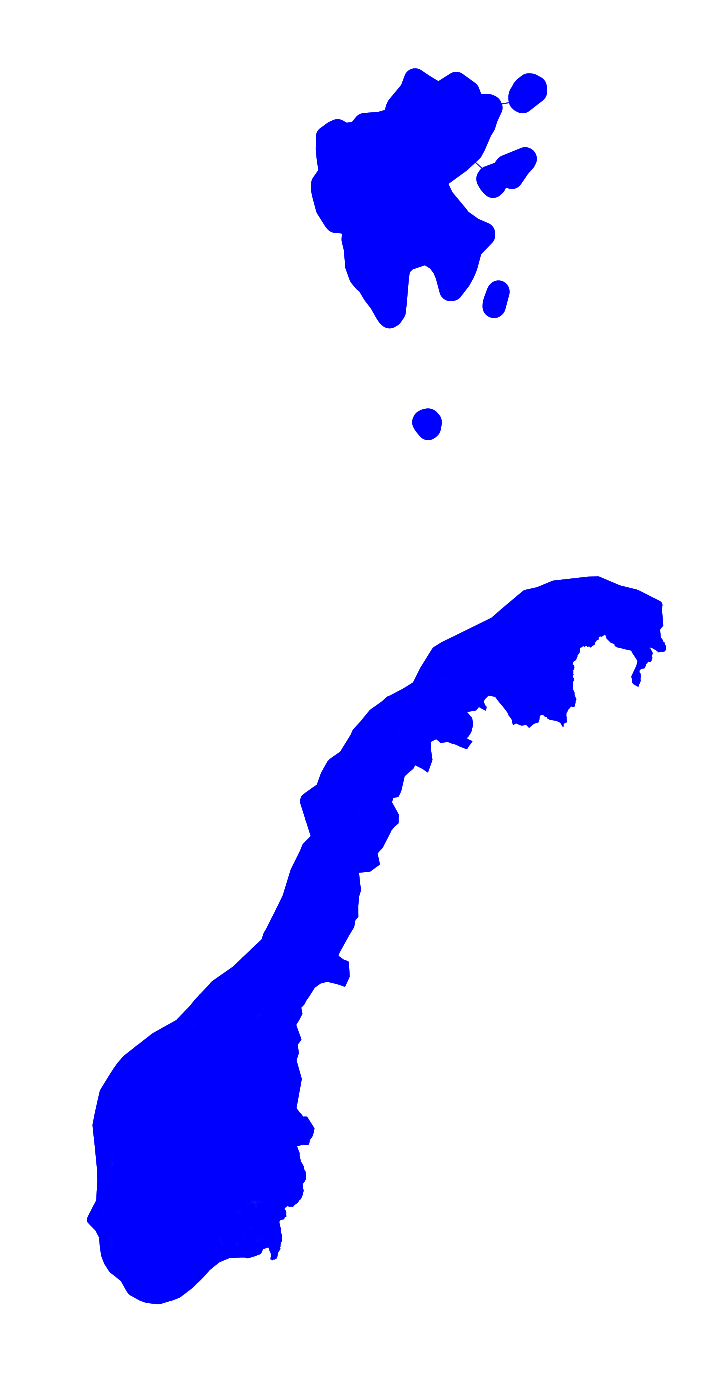

In [3]:
map.plot(figsize=(15, 25), linewidth=0.25, facecolor="blue", cmap=None)
plt.axis("off")
plt.show()

It's Norway, so that's a good start, but there's no separation lines between postal codes. Let's inspect the data:

In [4]:
print(f"Shape of the dataframe: {map.shape}")
map.tail()

Shape of the dataframe: (13404, 15)


,DATAUTTAKS,KOMMUNENUM,KVALITET,LOKALID,NAVNEROM,OBJTYPE,OPPDATERIN,OPPHAV,POSTNUMMER,POSTSTED,REF,SOSI_ID,TYPE,VERSJONID,geometry
13399,20180307102116,0704,55 1500,00082a48-544c-4d0f-8e33-50ce628f10ce,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",3150,TOLVSRÃD,:-71653 :-71652 :-70056 :-70055 :-72483 :-7248...,85888,FLATE,20180215,"POLYGON ((242859.56 6579707.43, 242866.9 65797..."
13400,20180307102116,0712,55 1500,f96fe2d6-a954-4f7d-a3cb-364f2fd20e5b,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",3264,LARVIK,:31475 :13324 :-14514 :-54363 :-72484 :-58569 ...,85889,FLATE,20180215,"POLYGON ((213500.8 6556309.18, 213564.64 65563..."
13401,20180307102116,0712,55 1500,715047a4-ba55-4482-8d33-d4dc36380c33,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",3256,LARVIK,:-72056 :-53933 :-72053 :-72054 :-67728 :-7207...,85890,FLATE,20180215,"POLYGON ((213874 6558469.99, 213983 6558414.99..."
13402,20180307102116,0237,55 1500,c7c71f9c-bf1e-4857-a09f-976d74e2a90c,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",2070,RÃ HOLT,:-54364 :-54365 :-70631 :31307 :31306 :34388 :...,85891,FLATE,20180215,"POLYGON ((287148.16 6688828.61, 287262.06 6688..."
13403,20180307102116,0237,55 1500,e4027091-68d1-49dd-999e-f0c8e01b0064,"""http://skjema.geonorge.no/SOSI/produktspesifi...",PostnummeromrÃ¥de,None,"""Posten Norge/Kartverket""",2074,"""EIDSVOLL VERK""",:-62891 :-55539 :37331 :-18685 :-70667 :-70632...,85892,FLATE,20180215,"POLYGON ((284189 6694607.91, 284863.04 6695195..."


So our data has 13404 entries and it seems that postal code is stored in a "POSTNUMMER". Let's inspect how many unique postal codes there are:

In [5]:
post_codes = set(map["POSTNUMMER"].array)
print(f"Number of unique postal codes: {len(post_codes)}.")

Number of unique postal codes: 3273.


Exercise asks us to also output the number of the postal codes, so there goes:

In [6]:
with open("norway_postal_codes_number", "w+") as f:
    f.write(f"There are {len(post_codes)} unique postal codes in this dataframe.")

Let's group our data by a postal code column using a dissolve method of the Geopandas library:

In [7]:
postal_codes = map.dissolve(by="POSTNUMMER")

Let's try plotting again:

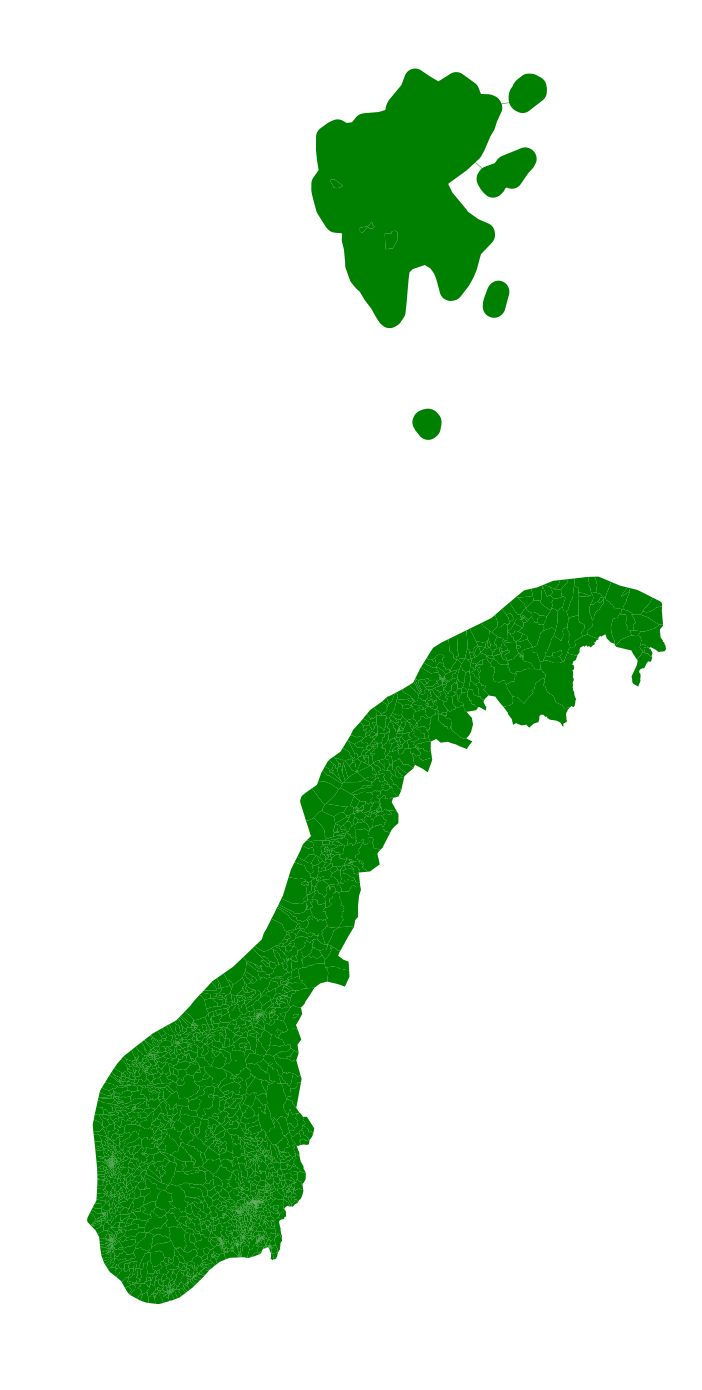

In [8]:
postal_codes.plot(figsize=(15, 25), linewidth=0.25, facecolor="Green", cmap=None)
plt.axis("off")
plt.show()

Vuola! Let's also output the graph as an image, as exercise asks us to do so:

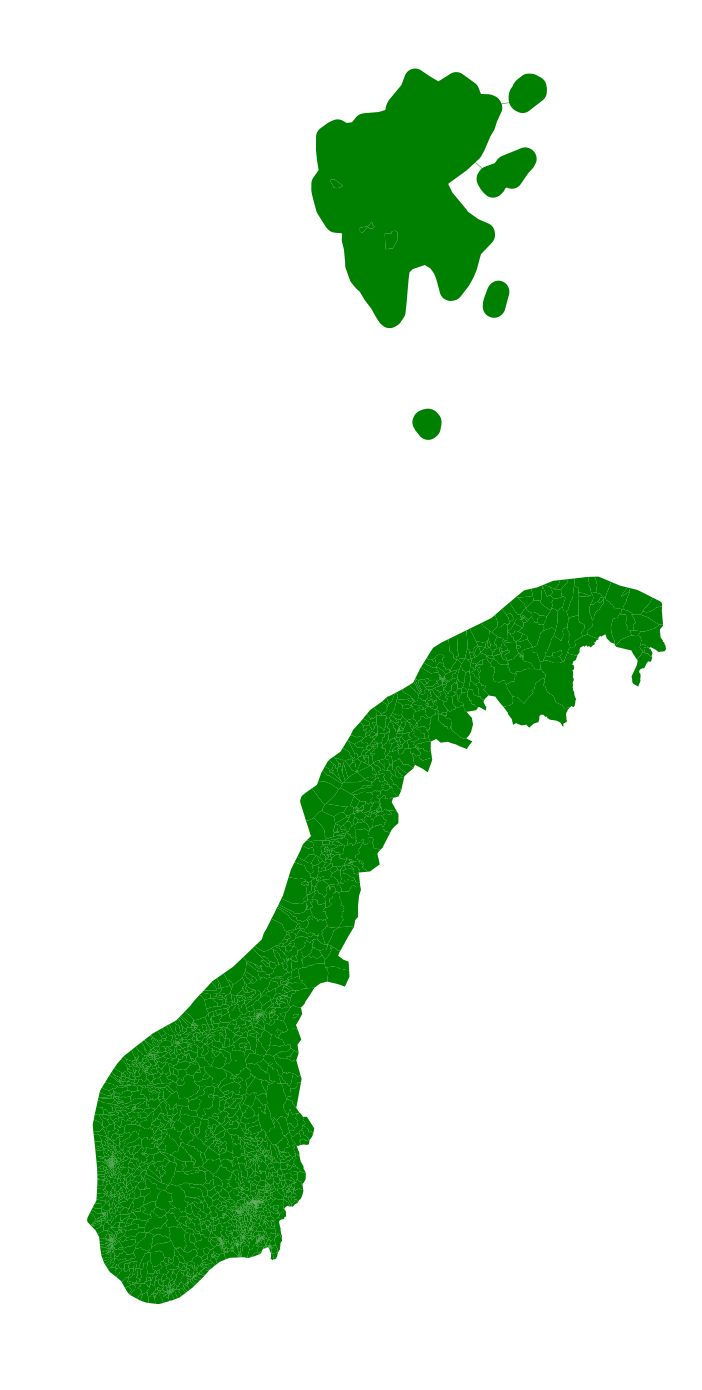

In [9]:
postal_codes.plot(figsize=(15, 25), linewidth=0.25, facecolor="Green", cmap=None)
plt.axis("off")
plt.savefig("norway_postal_codes_map.png")